In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import random
import numpy as np

In [2]:
combined_df = pd.read_csv('Data.csv')

In [5]:
combined_df.head()

,Unnamed: 0,Player,phase,Round,Money,Properties,Player Index,Num Players,GameNumber,winner,PlayerIndex
0,0,GreedyBot,buying,1,0,[28],1,4,1,RandomBot,GreedyBot1
1,1,GreedyBot,buying,2,0,"[28, 2]",1,4,1,RandomBot,GreedyBot1
2,2,GreedyBot,buying,3,0,"[28, 2, 6]",1,4,1,RandomBot,GreedyBot1
3,3,GreedyBot,buying,4,0,"[28, 2, 6, 4]",1,4,1,RandomBot,GreedyBot1
4,4,GreedyBot,buying,5,0,"[28, 2, 6, 4, 5]",1,4,1,RandomBot,GreedyBot1


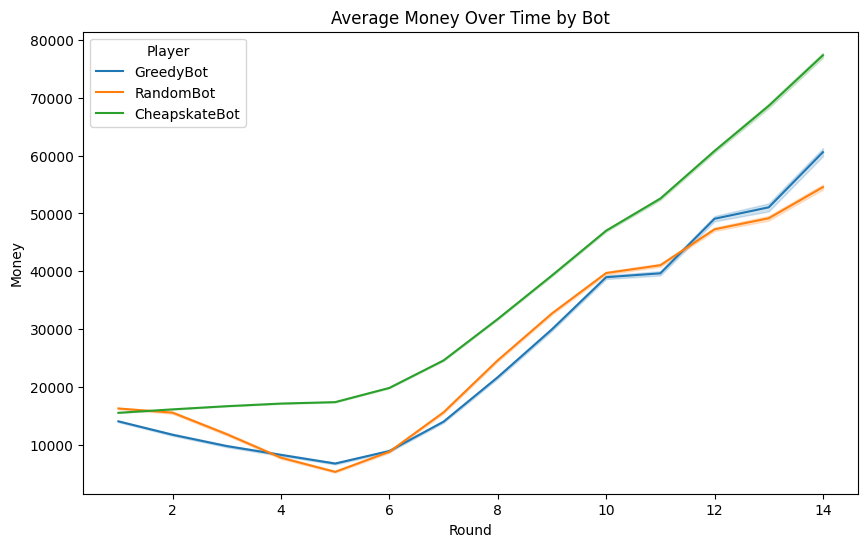

In [6]:
plt.figure(figsize=(10,6))
sns.lineplot(data=combined_df, x='Round', y='Money', hue='Player')
plt.title('Average Money Over Time by Bot')
plt.show()


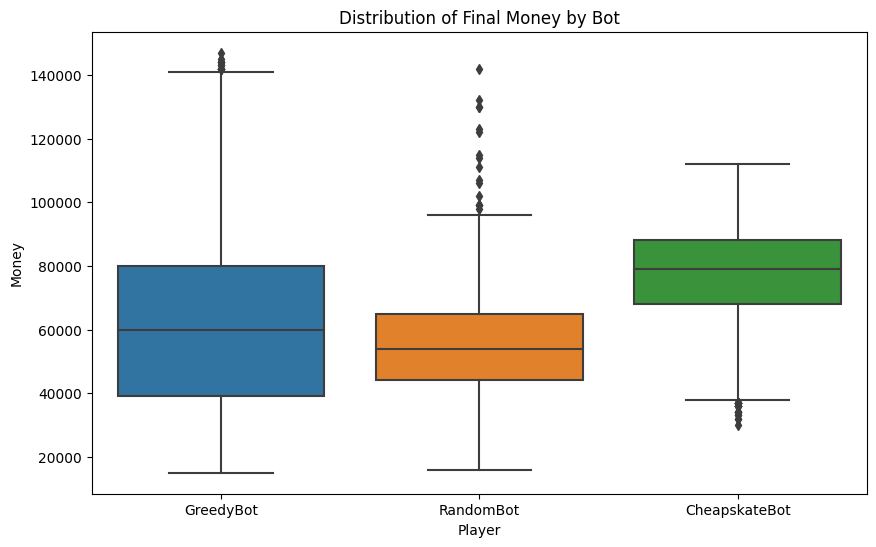

In [8]:
final_round = combined_df['Round'].max()
final_money = combined_df[combined_df['Round'] == final_round]

plt.figure(figsize=(10,6))
sns.boxplot(data=final_money, x='Player', y='Money')
plt.title('Distribution of Final Money by Bot')
plt.show()


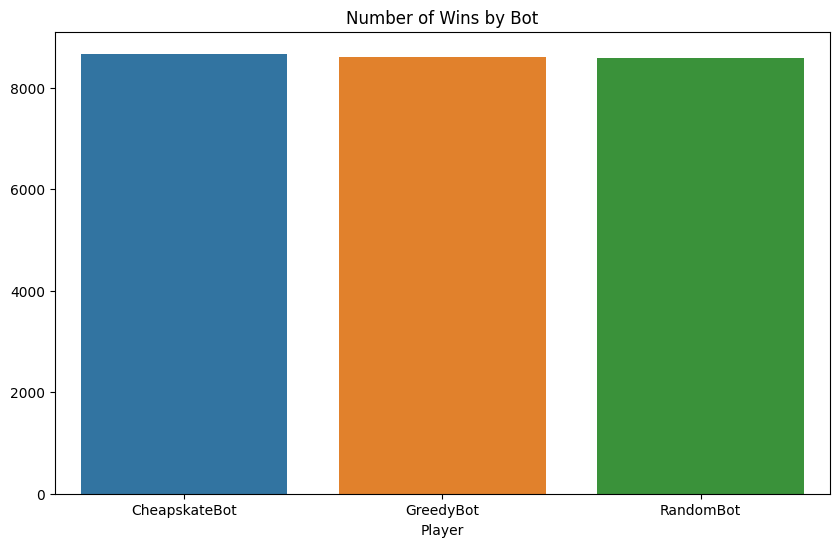

In [11]:
wins = combined_df.groupby(['GameNumber', 'Player'])['Money'].max().reset_index().groupby('Player').size()

plt.figure(figsize=(10,6))
sns.barplot(x=wins.index, y=wins.values, errorbar="sd")
plt.title('Number of Wins by Bot')
plt.show()

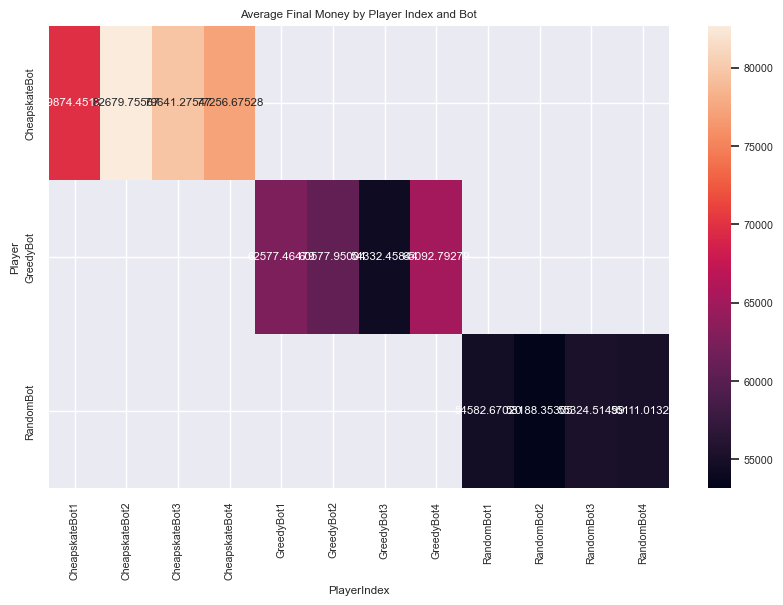

In [22]:
pivot = final_money.pivot_table(values='Money', index='Player', columns='PlayerIndex', aggfunc='mean')
plt.figure(figsize=(10,6))
sns.set(font_scale=0.7)
sns.heatmap(pivot, annot=True, fmt=".5f")
plt.title('Average Final Money by Player Index and Bot')
plt.show()


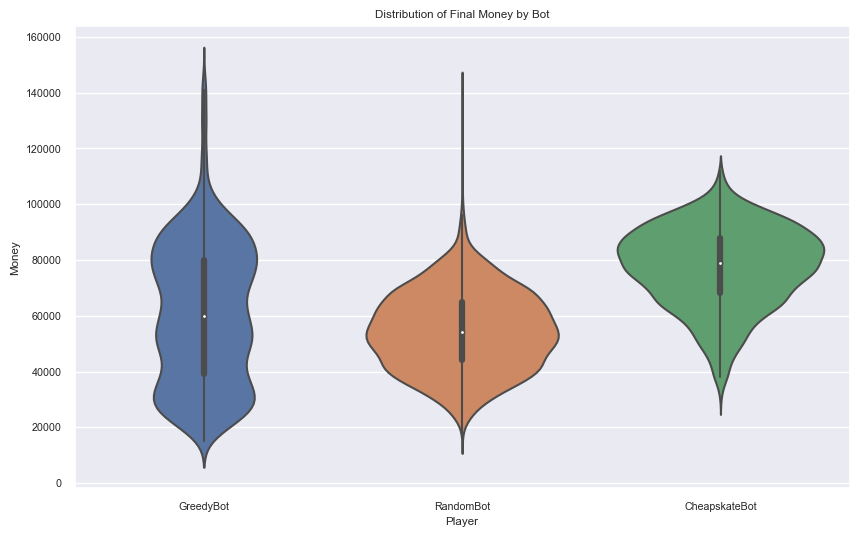

In [24]:
final_round = combined_df['Round'].max()
final_money = combined_df[combined_df['Round'] == final_round]

plt.figure(figsize=(10,6))
sns.violinplot(data=final_money, x='Player', y='Money')
plt.title('Distribution of Final Money by Bot')
plt.show()


In [25]:
plt.figure(figsize=(10,6))
sns.lineplot(data=combined_df, x='Round', y='Properties', hue='Player')
plt.title('Average Properties Over Time by Bot')
plt.show()


KeyboardInterrupt: 

In [15]:
summary = combined_df[combined_df['phase']  == 'buying']
summary = summary[combined_df['Round']  == 7]

summary['Property_sum'] = summary['Properties'].apply(lambda x: np.sum(np.array(eval(x))))


summary.head()

C:\Users\devan\AppData\Local\Temp\ipykernel_15128\125140306.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  summary = summary[combined_df['Round']  == 7]


,Unnamed: 0,Player,phase,Round,Money,Properties,Player Index,Num Players,GameNumber,winner,PlayerIndex,Property_sum
6,6,GreedyBot,buying,7,0,"[28, 2, 6, 4, 5, 3, 11]",1,4,1,RandomBot,GreedyBot1,59
20,20,RandomBot,buying,7,1000,"[19, 24, 15, 21, 30, 18, 25]",2,4,1,RandomBot,RandomBot2,152
34,34,RandomBot,buying,7,1000,"[22, 27, 7, 8, 10, 16, 13]",3,4,1,RandomBot,RandomBot3,103
48,48,RandomBot,buying,7,0,"[12, 17, 14, 29, 20, 26, 23]",4,4,1,RandomBot,RandomBot4,141
242,242,GreedyBot,buying,7,15000,"[19, 14, 29, 20, 24, 27, 23]",1,4,5,GreedyBot,GreedyBot1,156


C:\Users\devan\AppData\Local\Temp\ipykernel_10336\1085506548.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  summary = summary[combined_df['Round']  == 7]


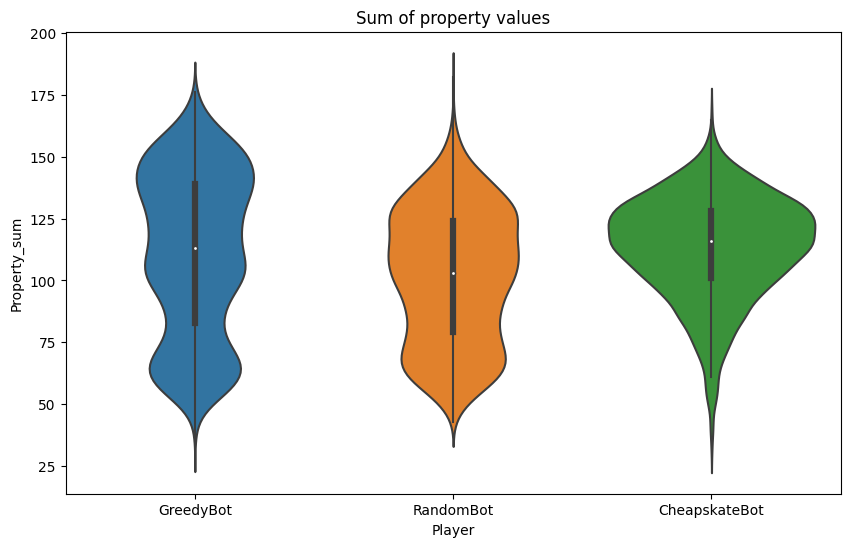

In [55]:
summary = combined_df[combined_df['phase']  == 'buying']
summary = summary[combined_df['Round']  == 7]

summary['Property_sum'] = summary['Properties'].apply(lambda x: np.sum(np.array(eval(x))))



plt.figure(figsize=(10,6))
sns.violinplot(data=summary, x='Player', y='Property_sum')
plt.title('Sum of property values')
plt.show()


In [24]:
final_round = combined_df.groupby('GameNumber').tail(1)

allprops = combined_df[combined_df['phase'] == 'buying']
allprops = allprops.groupby('GameNumber').tail(1)
allprops['Property_sum'] = allprops['Properties'].apply(lambda x: np.sum(np.array(eval(x))))


merged_df = final_round.merge(allprops[['GameNumber', 'Property_sum']], on='GameNumber', how='left')

merged_df.head()

,Unnamed: 0,Player,phase,Round,Money,Properties,Player Index,Num Players,GameNumber,winner,PlayerIndex,Property_sum
0,55,RandomBot,selling,14,68000,[],4,4,1,RandomBot,RandomBot4,141
1,115,RandomBot,selling,10,68000,[],6,6,2,CheapskateBot,RandomBot6,107
2,175,GreedyBot,selling,12,71000,[],5,5,3,RandomBot,GreedyBot5,93
3,235,GreedyBot,selling,10,54000,[],6,6,4,GreedyBot,GreedyBot6,92
4,291,RandomBot,selling,14,60000,[],4,4,5,GreedyBot,RandomBot4,102


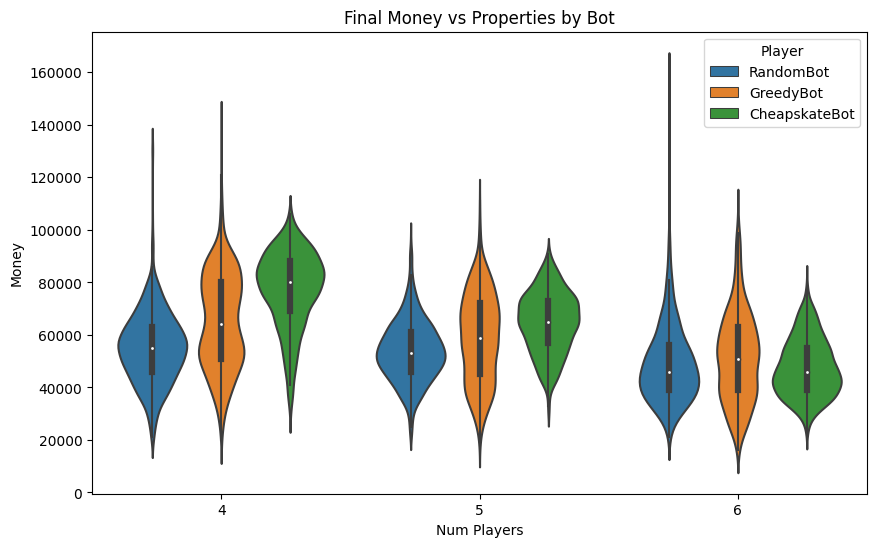

In [37]:
from matplotlib.lines import Line2D

plt.figure(figsize=(10,6))

plt.title('Final Money vs Properties by Bot')

sns.violinplot(x='Num Players', y='Money', hue='Player', data=final_round)
plt.show()

